In [42]:
# https://www.kaggle.com/kanav0183/sentimental-analysis-and-detailed-eda

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
#from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob

In [2]:
videos = pd.read_csv('data/USvideos.csv',encoding='utf8',error_bad_lines=False);#opening the file USvideos
comm = pd.read_csv('data/UScomments.csv',encoding='utf8',error_bad_lines=False);#opening the file UScomments

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\fbrolesi\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
%time
pol=[] # list which will contain the polarity of the comments
for i in comm.comment_text.values:
    try:
        analysis =TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    except:
        pol.append(0)

Wall time: 0 ns


In [9]:
comm['pol']=pol

comm['pol'][comm.pol==0]= 0

comm['pol'][comm.pol > 0]= 1
comm['pol'][comm.pol < 0]= -1

C:\Users\fbrolesi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\fbrolesi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\fbrolesi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vi

In [10]:
df_positive = comm[comm.pol==1]
df_positive.head()

,video_id,comment_text,likes,replies,pol
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,1.0
11,XpVt6Z1Gjjo,"Dear Logan, I really wanna get your Merch but ...",0,0,1.0
13,XpVt6Z1Gjjo,Casey is still better then logan,0,0,1.0
15,XpVt6Z1Gjjo,He happy cause he in a movie,0,0,1.0
18,XpVt6Z1Gjjo,It's been fun watching you grow. I'm at 42 day...,3,0,1.0


In [11]:
comm

,video_id,comment_text,likes,replies,pol
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.0
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.0
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.0
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,1.0
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-1.0


In [13]:
k= (' '.join(df_positive['comment_text']))

# wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

NameError: name 'wordcloud' is not defined

<Figure size 1080x360 with 0 Axes>

In [15]:
df_negative = comm[comm.pol==-1]
k= (' '.join(df_negative['comment_text']))
# wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

NameError: name 'wordcloud' is not defined

<Figure size 1080x360 with 0 Axes>

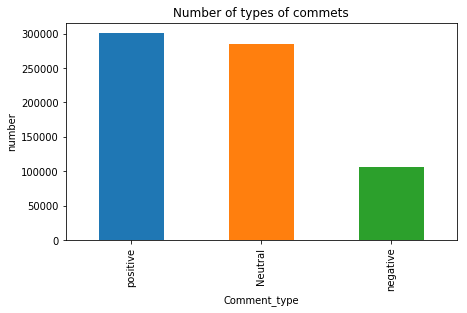

In [16]:
comm['pol'].replace({1:'positive',0:'Neutral',-1:'negative'}).value_counts().plot(kind='bar',figsize=(7,4));
plt.title('Number of types of commets');
plt.xlabel('Comment_type');
plt.ylabel('number');

In [17]:
id=[]
pos_comm=[]
neg_comm=[]
neutral_comm =[]
for i in set(comm.video_id):
    id.append(i)
    try:
        pos_comm.append(comm[comm.video_id==i].pol.value_counts()[1])
    except:
        pos_comm.append(0)
    try:    
        neg_comm.append(comm[comm.video_id==i].pol.value_counts()[-1])
    except:
        neg_comm.append(0)
    try:    
        neutral_comm.append(comm[comm.video_id==i].pol.value_counts()[0])
    except:
        neutral_comm.append(0)

In [18]:
df_unique = pd.DataFrame(id)
df_unique.columns=['id']
df_unique['pos_comm'] =pos_comm
df_unique['neg_comm'] = neg_comm
df_unique['neutral_comm'] = neutral_comm
df_unique['total_comments']=df_unique['pos_comm']+df_unique['neg_comm']+df_unique['neutral_comm']
df_unique.head(6)

,id,pos_comm,neg_comm,neutral_comm,total_comments
0,kFx0h3YDXz0,93,28,79,200
1,oSV39tYy3Xg,3,8,0,11
2,yTVysPsX5ns,22,14,64,100
3,TO5cYWd12lQ,228,29,143,400
4,E-NxvaVWjBM,15,4,6,25
5,2LkEa-JV9Kc,37,26,37,100


In [19]:
df_unique.to_csv('data/unique.csv',index=False,)

In [20]:
videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [21]:
comm.head()

,video_id,comment_text,likes,replies,pol
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [22]:
videos.date.value_counts()

12.10    200
4.10     200
20.10    200
5.10     200
18.10    200
15.10    200
16.10    200
29.09    200
1.10     200
14.10    200
11.10    200
23.09    200
15.09    200
2.10     200
21.09    200
14.09    200
13.10    200
17.09    200
21.10    200
3.10     200
22.10    200
16.09    200
19.10    200
10.10    200
17.10    200
7.10     200
30.09    200
28.09    200
13.09    200
22.09    200
8.10     200
20.09    200
19.09    200
6.10     200
18.09    200
25.09    199
24.09    199
27.09    199
26.09    199
9.10     196
Name: date, dtype: int64

In [23]:
print(videos.video_id.value_counts()[:12]) # these videos have become 7 times the most trending videos of these 2 weeks.
most_trending = videos.video_id.value_counts()[:12].index

LunHybOKIjU    8
Hlt3rA-oDao    8
Oo0NJsr5m4I    8
iALfvFpcItE    7
ZczwzVhai9E    7
jUrpOg4fBs0    7
cLdxuaxaQwc    7
APHgDFRpCi0    7
sjlHnJvXdQs    7
udnGW3E1vxY    7
8ndhidEmUbI    7
1QWLyi03twg    7
Name: video_id, dtype: int64


In [24]:
videos[videos.video_id=='mlxdnyfkWKQ']

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
1647,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,[none],93109,1642,86,307,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,21.09
1650,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,[none],93153,1644,86,307,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,21.09
1855,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,[none],115720,1747,89,313,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,22.09
2129,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,[none],135303,1781,92,252,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,23.09
2337,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,[none],141666,1790,94,254,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,24.09
2561,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,scary|funny|russia|prikol|car|traffic|sidecar|...,161606,1823,97,257,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,25.09
2790,mlxdnyfkWKQ,Bear in Russian traffic,Niks Ļeoņenko,23,scary|funny|russia|prikol|car|traffic|sidecar|...,201549,1944,101,260,https://i.ytimg.com/vi/mlxdnyfkWKQ/default.jpg,26.09


In [25]:
for i in most_trending:
    info =videos[videos.video_id== i][['title','channel_title','views','likes','dislikes','comment_total']].tail(1)# get the last row of the dataframe(total like,views,dislikes)
    print(info)
    print('****************************************************************************************')

                                                  title channel_title  \
7135  Eminem Rips Donald Trump In BET Hip Hop Awards...   BETNetworks   

         views   likes  dislikes  comment_total  
7135  33191594  982842    184310         337603  
****************************************************************************************
                title        channel_title    views   likes  dislikes  \
7982  Kellywise - SNL  Saturday Night Live  6845621  132302      8213   

      comment_total  
7982           9309  
****************************************************************************************
                                                  title channel_title  \
7184  Tourist terrified by new glass walkway that cr...          CGTN   

        views  likes  dislikes  comment_total  
7184  5145601  38234      7372           6861  
****************************************************************************************
                     title channel_title   views  li

In [27]:
# slpitting the tags
tags = videos['tags'].map(lambda k: k.lower().split('|')).values 

# joining and making a complete list
k= (' '.join(videos['tags']))  
# wordcloud = WordCloud(width = 1000, height = 500).generate((' '.join(k.lower().split('|'))))# word cloud


plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

NameError: name 'wordcloud' is not defined

<Figure size 1080x360 with 0 Axes>

In [28]:
videos.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'tags', 'views',
       'likes', 'dislikes', 'comment_total', 'thumbnail_link', 'date'],
      dtype='object')

In [29]:
df1 =pd.DataFrame(videos.channel_title.value_counts())
df1.columns=['times channel got trenidng']# how many times the channel got trending'
df1.head(6)

,times channel got trenidng
Vox,40
Jimmy Kimmel Live,40
First We Feast,39
jacksfilms,38
The Tonight Show Starring Jimmy Fallon,38
vlogbrothers,38


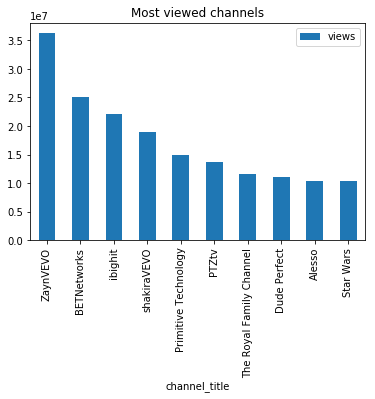

In [30]:
df_channel =pd.DataFrame(videos.groupby(by=['channel_title'])['views'].mean()).sort_values(by='views',ascending=False)
df_channel.head(10).plot(kind='bar');
plt.title('Most viewed channels');

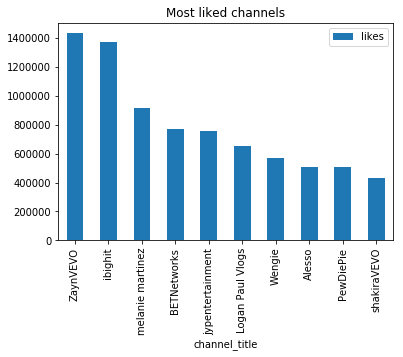

In [31]:
df_channel =pd.DataFrame(videos.groupby(by=['channel_title'])['likes'].mean()).sort_values(by='likes',ascending=False)
df_channel.head(10).plot(kind='bar');
plt.title('Most liked channels');

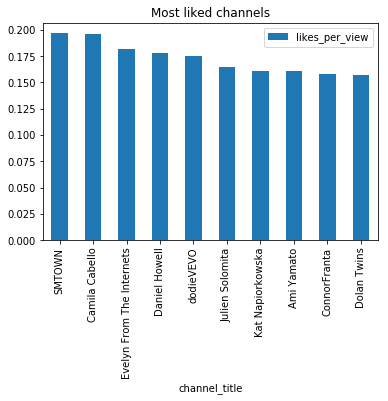

In [32]:
videos['likes_per_view']=videos['likes']/videos['views']
df_channel =pd.DataFrame(videos.groupby(by=['channel_title'])['likes_per_view'].mean()).sort_values(by='likes_per_view',ascending=False)
df_channel.head(10).plot(kind='bar');
plt.title('Most liked channels');

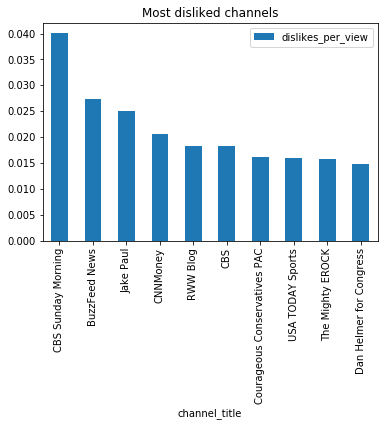

In [33]:
videos['dislikes_per_view']=videos['dislikes']/videos['views']
df_channel =pd.DataFrame(videos.groupby(by=['channel_title'])['dislikes_per_view'].mean()).sort_values(by='dislikes_per_view',ascending=False)
df_channel.head(10).plot(kind='bar');
plt.title('Most disliked channels');

# Sentimental Analysis

In [34]:
unique = pd.read_csv('data/unique.csv',)

In [35]:
unique.sort_values(by='pos_comm',ascending=False).head(5)

,id,pos_comm,neg_comm,neutral_comm,total_comments
1899,eERPlIdPJtI,426,32,142,600
68,Zmi9iQp6944,411,55,34,500
2028,udnGW3E1vxY,404,51,242,697
636,xTyTQgb-y-A,401,40,127,568
559,zKriLekFPwg,399,46,255,700


In [36]:
videos[videos.video_id == 'eERPlIdPJtI'].title[225]

'Weight Update: 6 weeks Post Surgery! 93 pounds!'

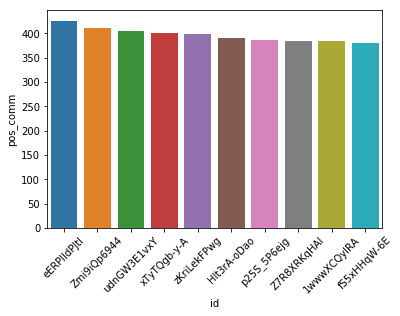

<Figure size 360x288 with 0 Axes>

In [37]:
sns.barplot(data=unique.sort_values(by='pos_comm',ascending=False).head(10),x='id',y='pos_comm')
plt.xticks(rotation=45);
plt.figure(figsize=(5,4));

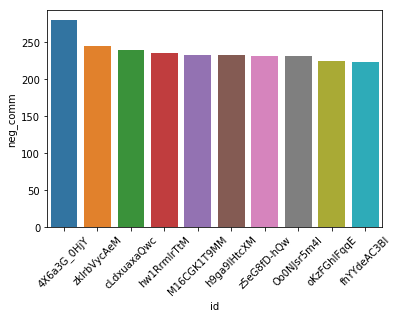

<Figure size 360x288 with 0 Axes>

In [38]:
sns.barplot(data=unique.sort_values(by='neg_comm',ascending=False).head(10),x='id',y='neg_comm')
plt.xticks(rotation=45);
plt.figure(figsize=(5,4));

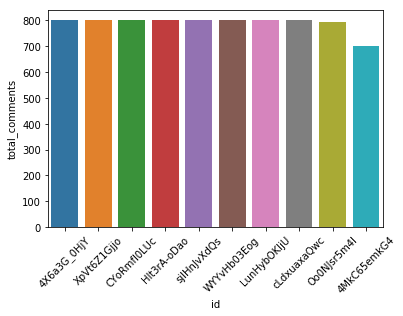

<Figure size 360x288 with 0 Axes>

In [39]:
sns.barplot(data=unique.sort_values(by='total_comments',ascending=False).head(10),x='id',y='total_comments')
plt.xticks(rotation=45);
plt.figure(figsize=(5,4));

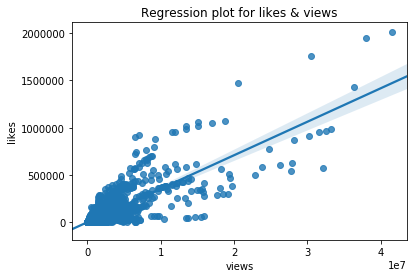

In [40]:
sns.regplot(data=videos,x='views',y='likes');
plt.title("Regression plot for likes & views");

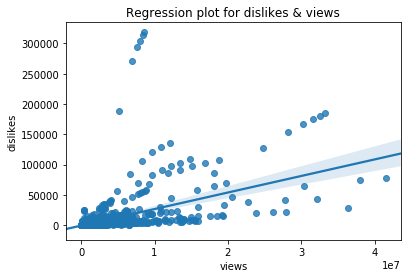

In [41]:
sns.regplot(data=videos,x='views',y='dislikes');
plt.title("Regression plot for dislikes & views");

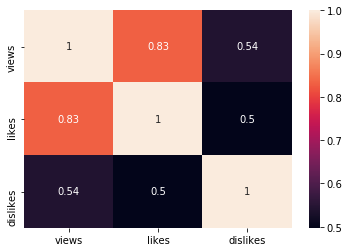

In [43]:
df_corr = videos[['views','likes','dislikes']]

sns.heatmap(df_corr.corr(),annot=True)